In [1]:
from glob import glob
import numpy as np

In [2]:
alldata = np.empty(shape=[0, 188])
print(alldata.shape)
paths = glob('MIT-BIH/*.csv')
for path in paths:
    print('Loading ', path)
    csvrows = np.loadtxt(path, delimiter=',')
    alldata = np.append(alldata, csvrows, axis=0)

(0, 188)
Loading  MIT-BIH\100_MLII.csv
Loading  MIT-BIH\100_V5.csv
Loading  MIT-BIH\101_MLII.csv
Loading  MIT-BIH\101_V1.csv
Loading  MIT-BIH\102_V2.csv
Loading  MIT-BIH\102_V5.csv
Loading  MIT-BIH\103_MLII.csv
Loading  MIT-BIH\103_V2.csv
Loading  MIT-BIH\104_V2.csv
Loading  MIT-BIH\104_V5.csv
Loading  MIT-BIH\105_MLII.csv
Loading  MIT-BIH\105_V1.csv
Loading  MIT-BIH\106_MLII.csv
Loading  MIT-BIH\106_V1.csv
Loading  MIT-BIH\107_MLII.csv
Loading  MIT-BIH\107_V1.csv
Loading  MIT-BIH\108_MLII.csv
Loading  MIT-BIH\108_V1.csv
Loading  MIT-BIH\109_MLII.csv
Loading  MIT-BIH\109_V1.csv
Loading  MIT-BIH\111_MLII.csv
Loading  MIT-BIH\111_V1.csv
Loading  MIT-BIH\112_MLII.csv
Loading  MIT-BIH\112_V1.csv
Loading  MIT-BIH\113_MLII.csv
Loading  MIT-BIH\113_V1.csv
Loading  MIT-BIH\114_MLII.csv
Loading  MIT-BIH\114_V5.csv
Loading  MIT-BIH\115_MLII.csv
Loading  MIT-BIH\115_V1.csv
Loading  MIT-BIH\116_MLII.csv
Loading  MIT-BIH\116_V1.csv
Loading  MIT-BIH\117_MLII.csv
Loading  MIT-BIH\117_V2.csv
Loading  

Shuffle and separate the data

In [3]:
# Randomly mix rows
np.random.shuffle(alldata)
totrows = len(alldata)
trainrows = int((totrows * 3 / 5) + 0.5) # 60%
testrows = int((totrows * 1 / 5) + 0.5) # 20%
validaterows = totrows - trainrows - testrows # 20%
mark1 = trainrows
mark2 = mark1 + testrows

Save data

In [4]:
with open('train.csv', "wb") as fin:
    np.savetxt(fin, alldata[:mark1], delimiter=",", fmt='%f')

In [5]:
with open('test.csv', "wb") as fin:
    np.savetxt(fin, alldata[mark1:mark2], delimiter=",", fmt='%f')

In [6]:
with open('validate.csv', "wb") as fin:
    np.savetxt(fin, alldata[mark2:], delimiter=",", fmt='%f')

In [22]:
#1. Initialize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import logging 

tf.get_logger().setLevel(logging.INFO)

In [23]:
#2. Load data
# Training dataset.
df = pd.read_csv("train.csv", header=None)
x_train = df.values[:, :-1]
y_train = df.values[:, -1].astype(int)

# Validation dataset.
df = pd.read_csv("validate.csv", header=None)
x_validate = df.values[:, :-1]
y_validate = df.values[:, -1].astype(int)

# Test dataset.
df = pd.read_csv("test.csv", header=None)
x_test = df.values[:, :-1]
y_test = df.values[:, -1].astype(int)

In [24]:
del df

In [25]:
#3. Visualize Data
C0 = np.argwhere(y_train == 0).flatten()
C1 = np.argwhere(y_train == 1).flatten()

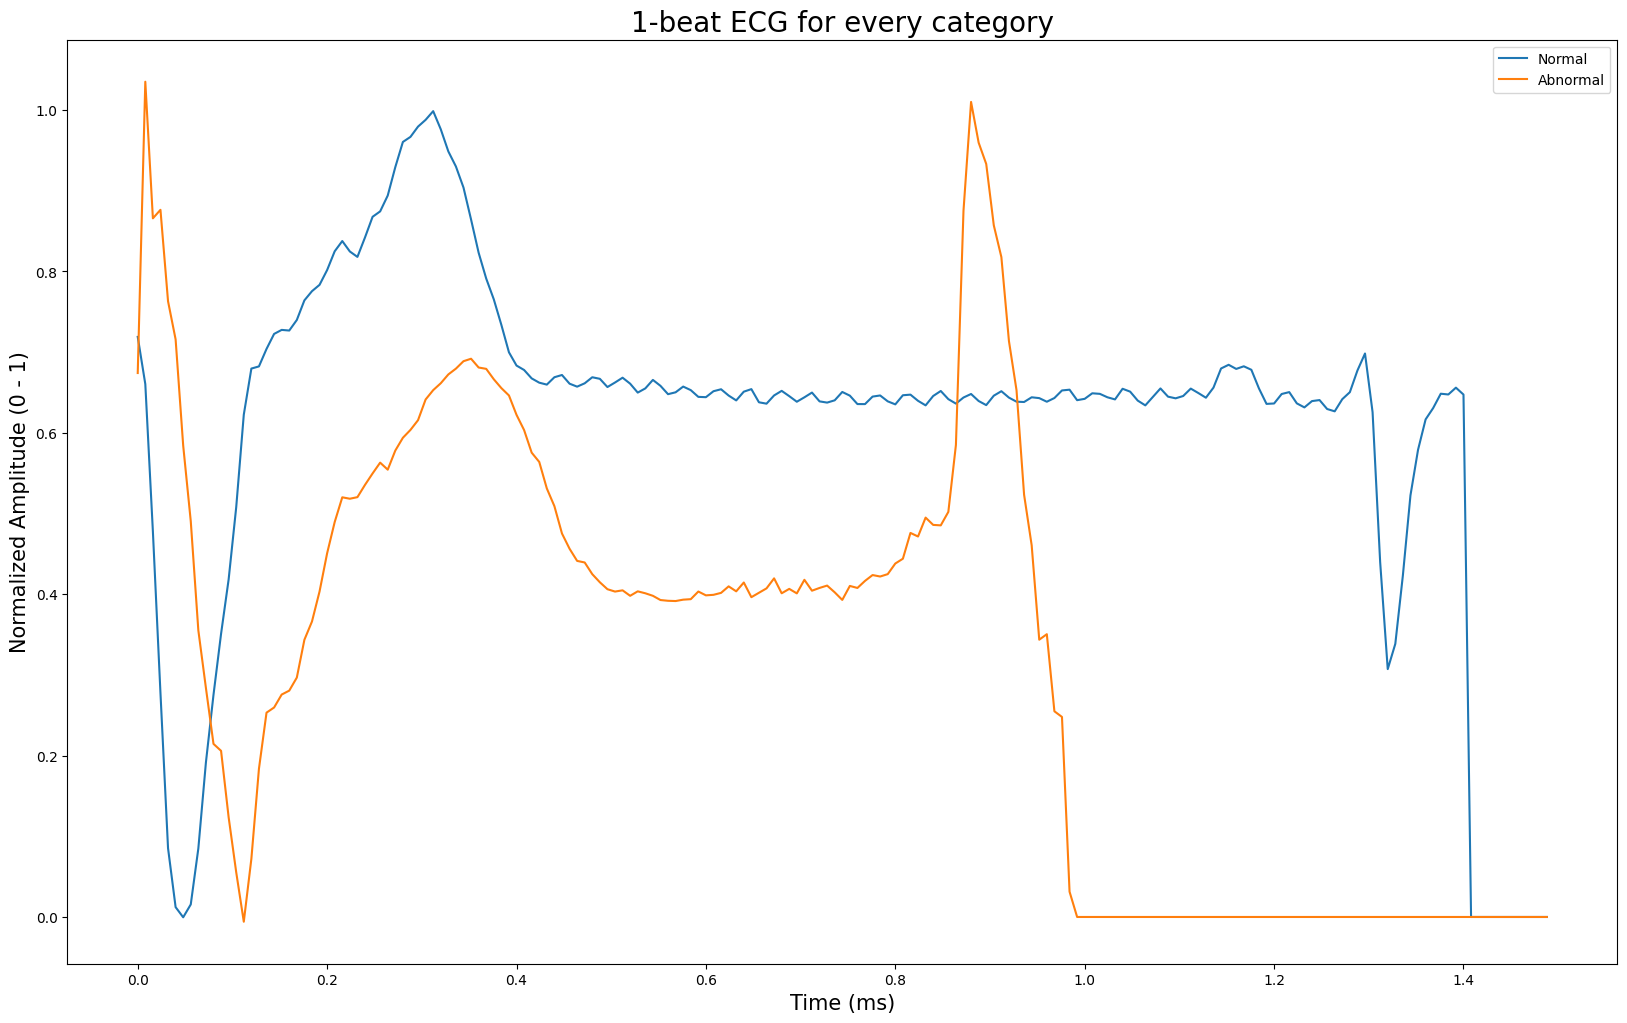

In [26]:
x = np.arange(0, 187)*8/1000.0

plt.figure(figsize=(20,12))
plt.plot(x, x_train[C0, :][0], label="Normal") # Display first normal beat.
plt.plot(x, x_train[C1, :][0], label="Abnormal") # Display first abnormal beat.
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Normalized Amplitude (0 - 1)", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [45]:
#4. Train Model
feature_columns = [tf.feature_column.numeric_column('beat', shape=[187])]

estimator = tf.estimator.DNNClassifier(
   feature_columns=feature_columns,
   hidden_units=[256, 64, 16],
   optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
   n_classes=2,
   dropout=0.1,
   model_dir='ecg_model'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ecg_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
num_epochs = None
train_dataset = tf.data.Dataset.from_tensor_slices(({'beat': x_train}, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(batch_size = 50).repeat(num_epochs)

input_fn_train = lambda: train_dataset